In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
# Make 3d plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
# -----------------------------

# Measuring length scales with autocorrelation function

First we'll load an image into an `numpy` array using `plt.imread`. If you have an error message here, you may have to install a Python image library called `Pillow`. Simply type the following on your terminal:

`pip install Pillow`

[[ 63  63  56 ...  53  59  61]
 [ 61  62  58 ...  52  61  59]
 [ 96  96  82 ...  78  57  58]
 ...
 [ 96  95 115 ...  60  83  81]
 [100  99  98 ...  90  83  83]
 [101  99  97 ...  88  83  83]]
(1944, 3016)


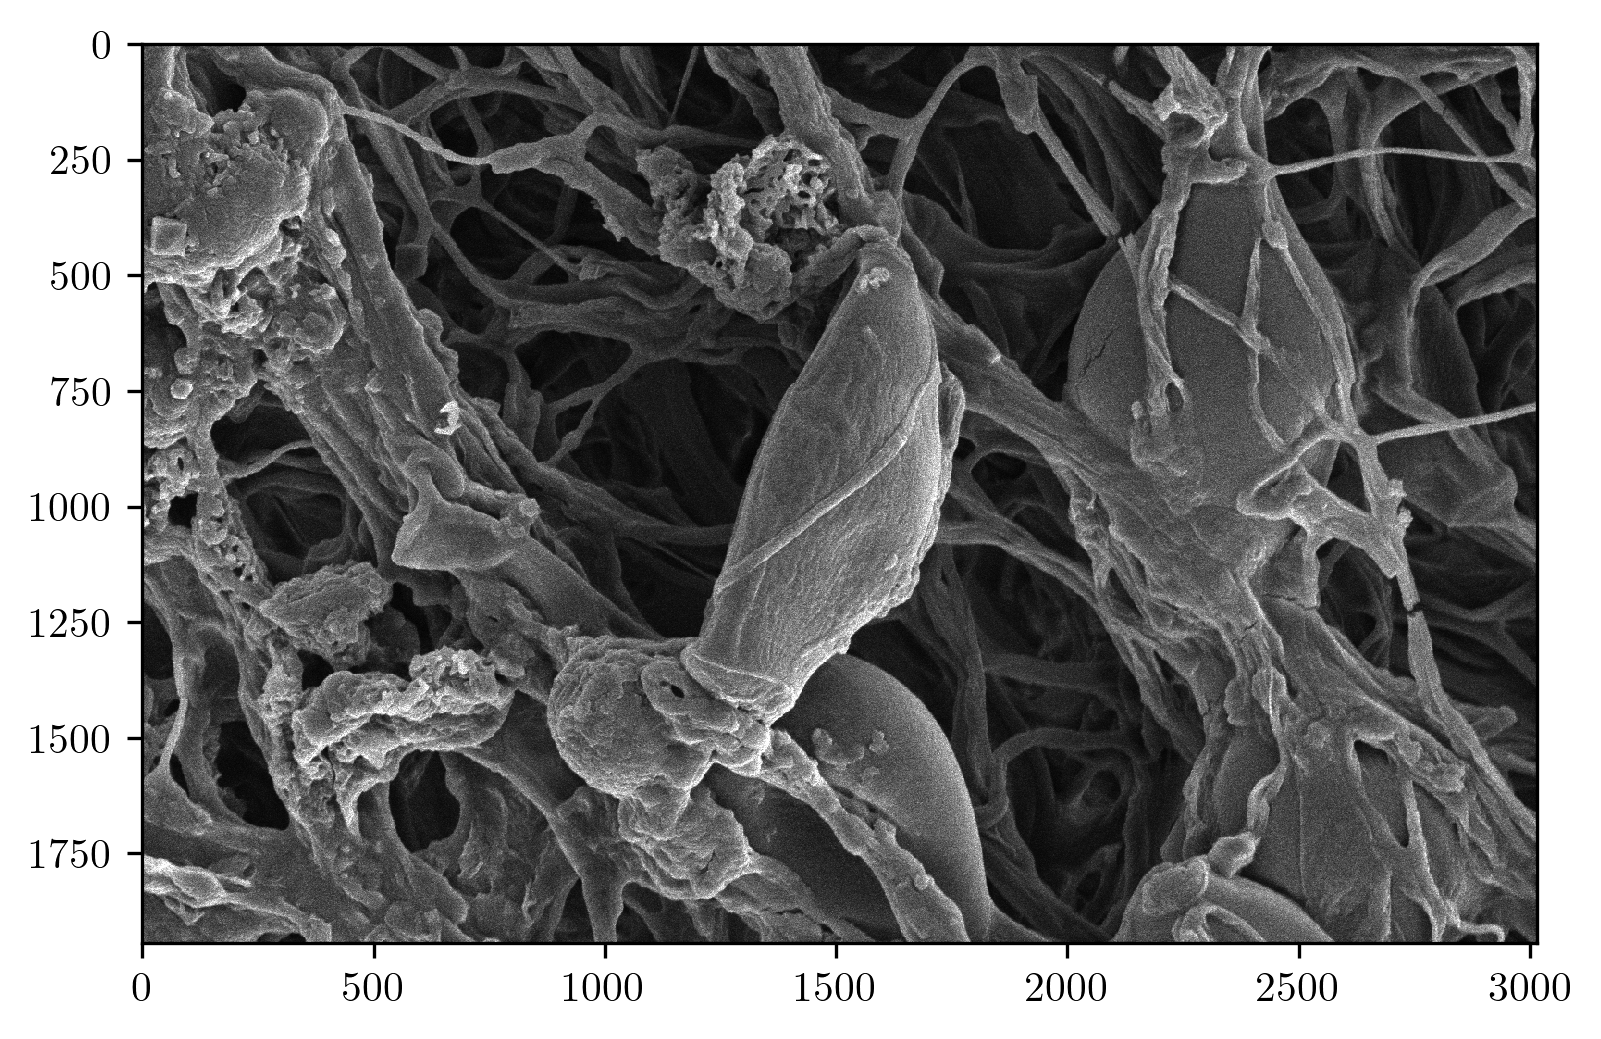

In [6]:
image = plt.imread('data/fiber2.jpg')
print(image)
plt.imshow(image, cmap='gray')
print(image.shape)

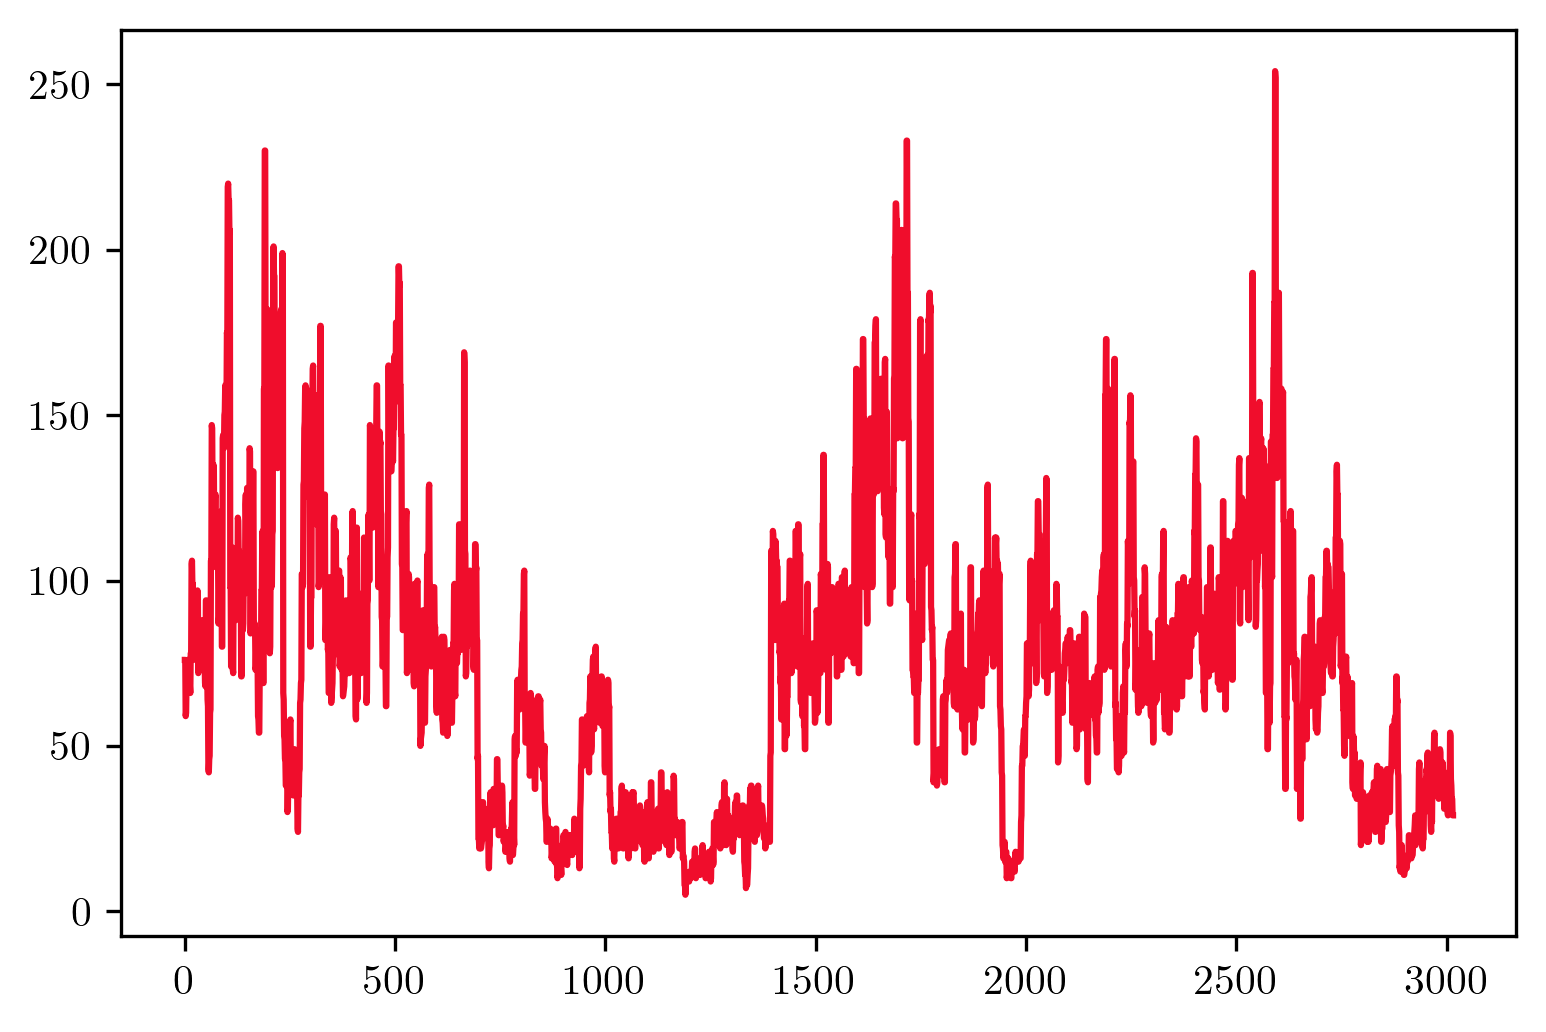

In [7]:
row = 750
linescan = image[row,:]
plt.plot(linescan)

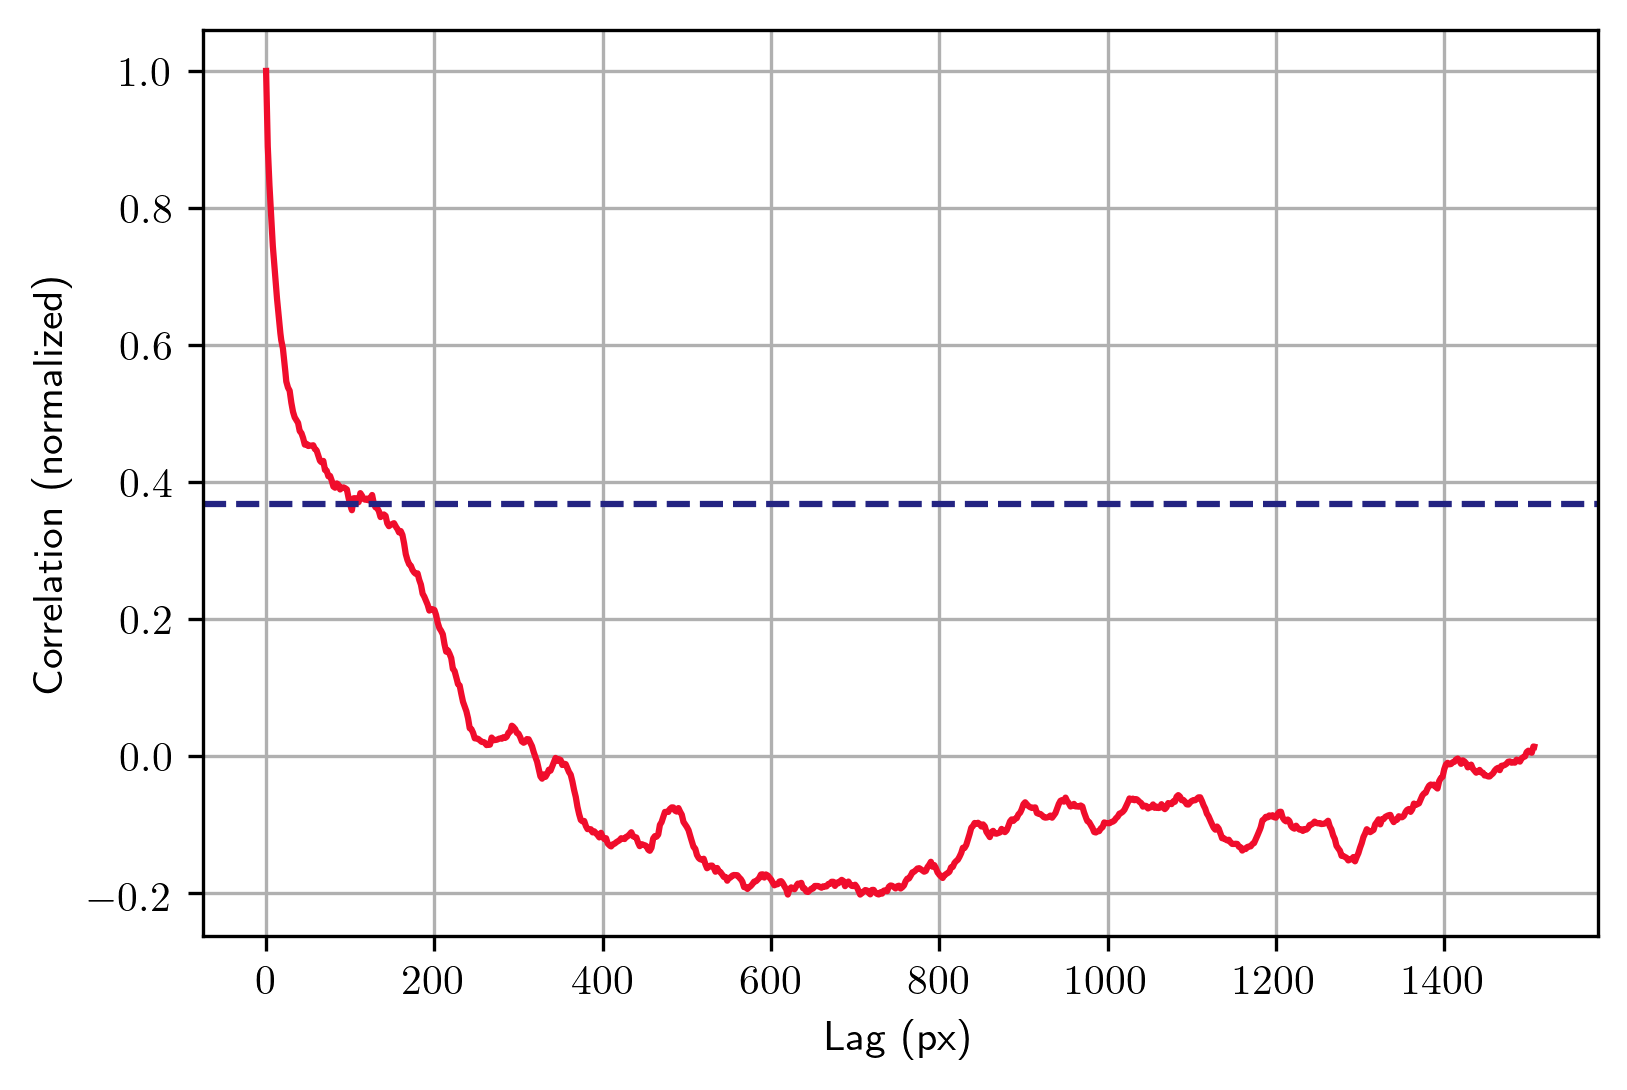

In [13]:
# Normalize
norm_linescan = (linescan - np.mean(linescan))/np.std(linescan)

# Then calculate the autocorrelation function
xcorr = np.correlate(norm_linescan, norm_linescan, mode='same')

# only keep last half
xcorr = xcorr[int(len(xcorr)/2):]

# normalize
xcorr = xcorr / np.max(xcorr)
plt.plot(xcorr)
plt.grid()
plt.xlabel('Lag (px)')
plt.ylabel('Correlation (normalized)')

# Typical feature "length-scale" value here is when correlation = e^-1
plt.gca().axhline(np.exp(-1), color = COLORS[1], linestyle='--')

# Size Distributions

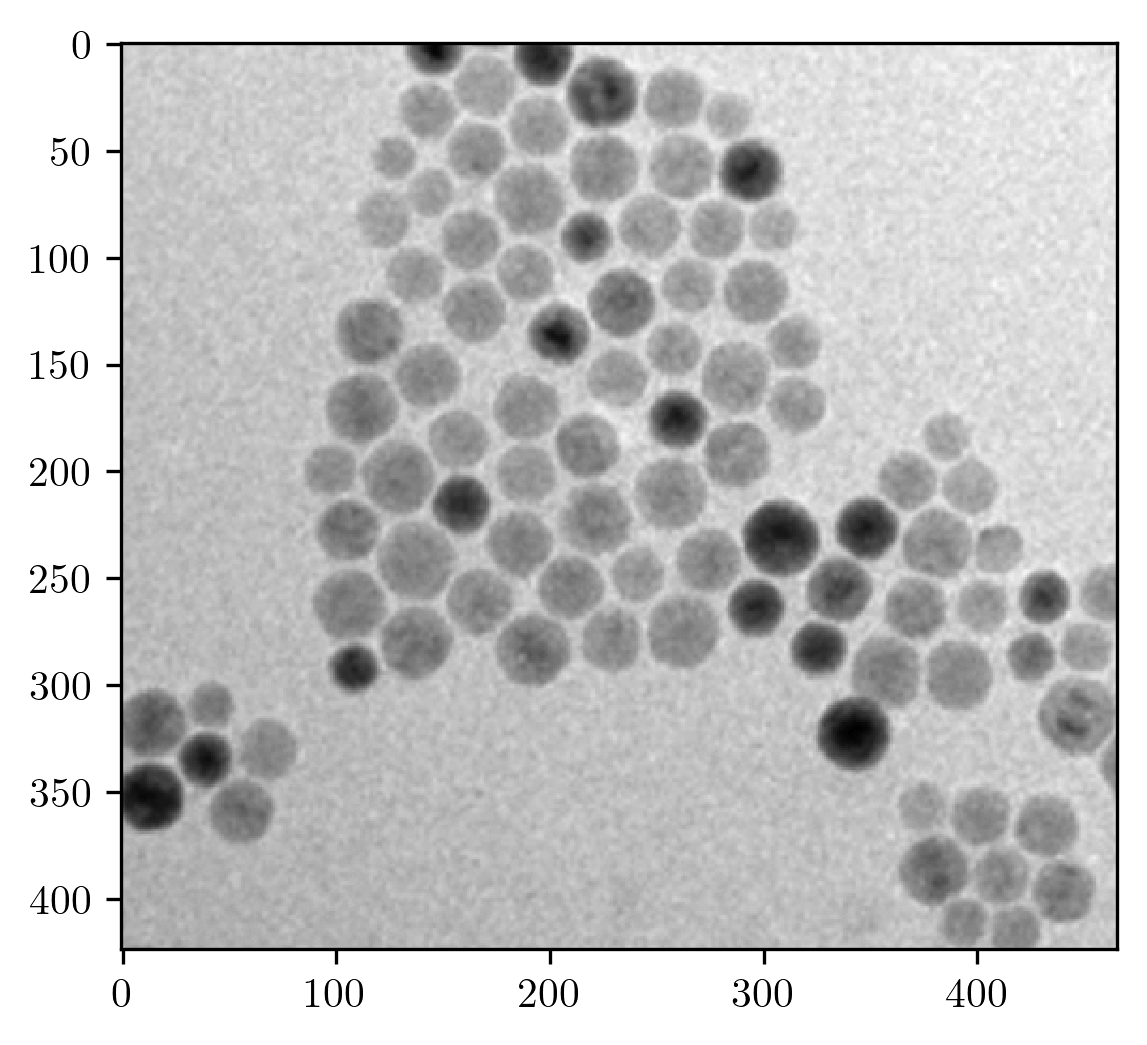

In [17]:
# Loading and plotting images
image = plt.imread('data/qd.jpg')
plt.imshow(image, cmap='gray')

We'll do some preprocessing to make the picture a bit better for analysis. First, we'll rescale the pixel intensity values so that we can dim features in the image. For this we'll use `scikit-image`, and in particular, the `skimage.exposure` module. You may have to install `scikit-image`, which you can do by entering the following in your terminal:

`pip install scikit-image`

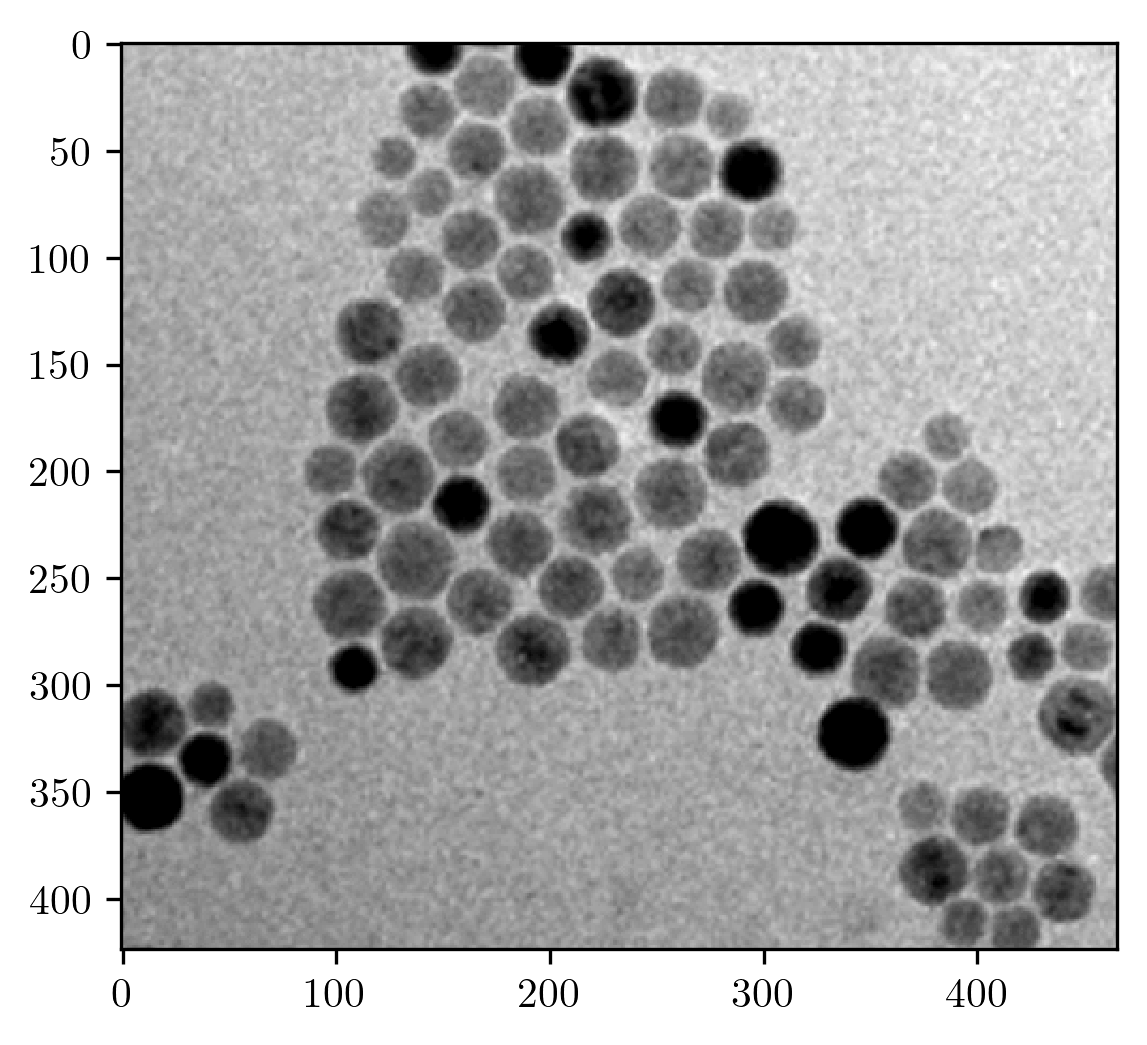

In [19]:
from skimage import exposure
image = exposure.rescale_intensity(image, in_range=(50, 200))
plt.imshow(image, cmap='gray')

We're going to do an image processing technique called edge-finding, which tries to find the boundaries between different colored regins in the image.

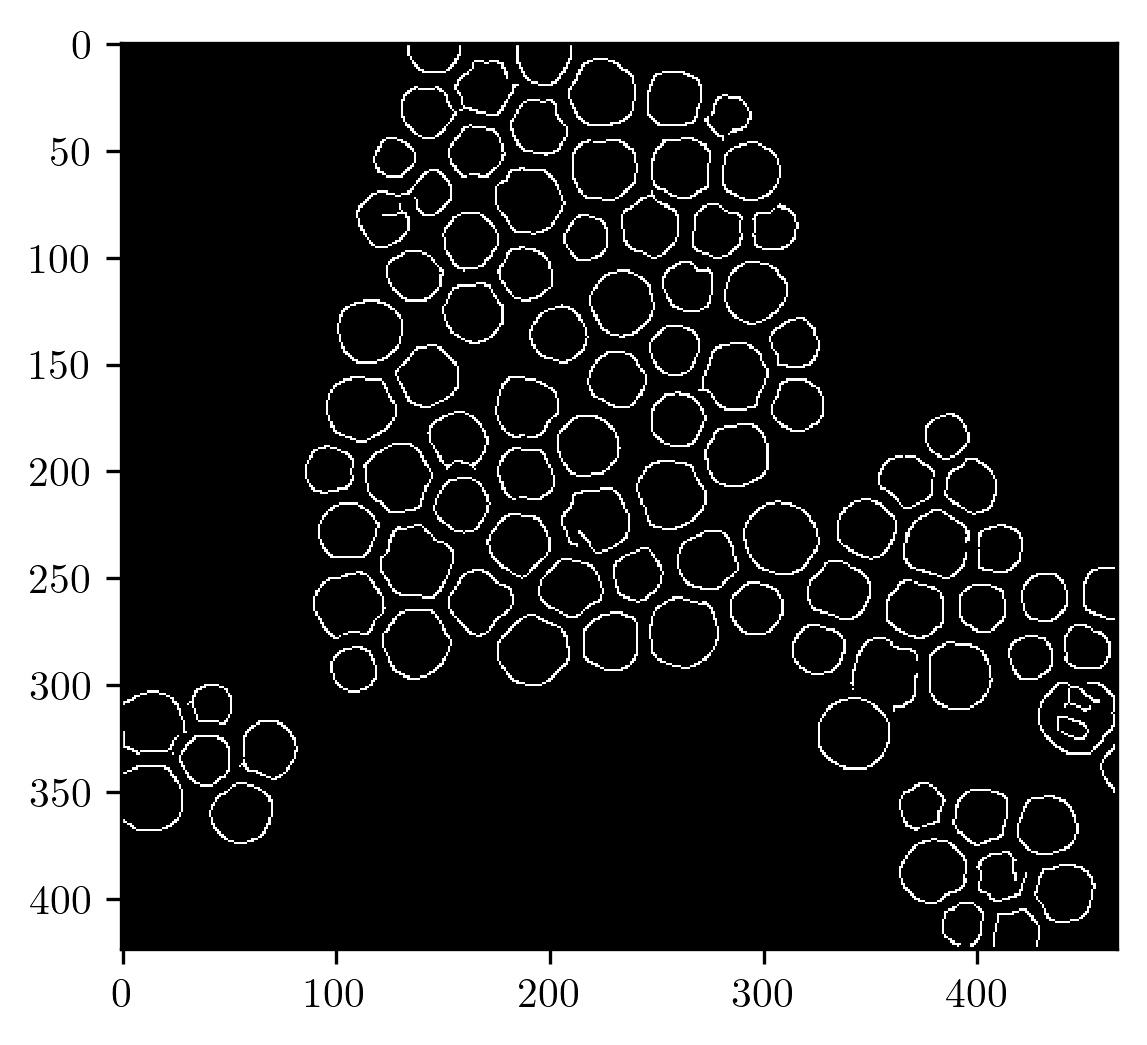

In [20]:
# edge finding
from skimage.feature import canny
edges = canny(image, sigma=2.5, low_threshold=10, high_threshold=50)
plt.imshow(edges, cmap='gray')

We will then extract near-circles using technique called Hough transformation.

In [23]:
# extract circles
from skimage.transform import hough_circle, hough_circle_peaks

hough_radii = np.arange(10, 35)
res = hough_circle(edges, hough_radii)

# find 100 most prominent circles
accums, cx, cy, radii = hough_circle_peaks(res, hough_radii, total_num_peaks=100)

Now we have the centers and radii of all the circles that were found. We could, for example, use this information to come up with a NP radius distributions as features.

(array([11., 11., 16.,  0., 20., 18.,  0., 13.,  8.,  3.]),
 array([10. , 10.7, 11.4, 12.1, 12.8, 13.5, 14.2, 14.9, 15.6, 16.3, 17. ]),
 <a list of 10 Patch objects>)

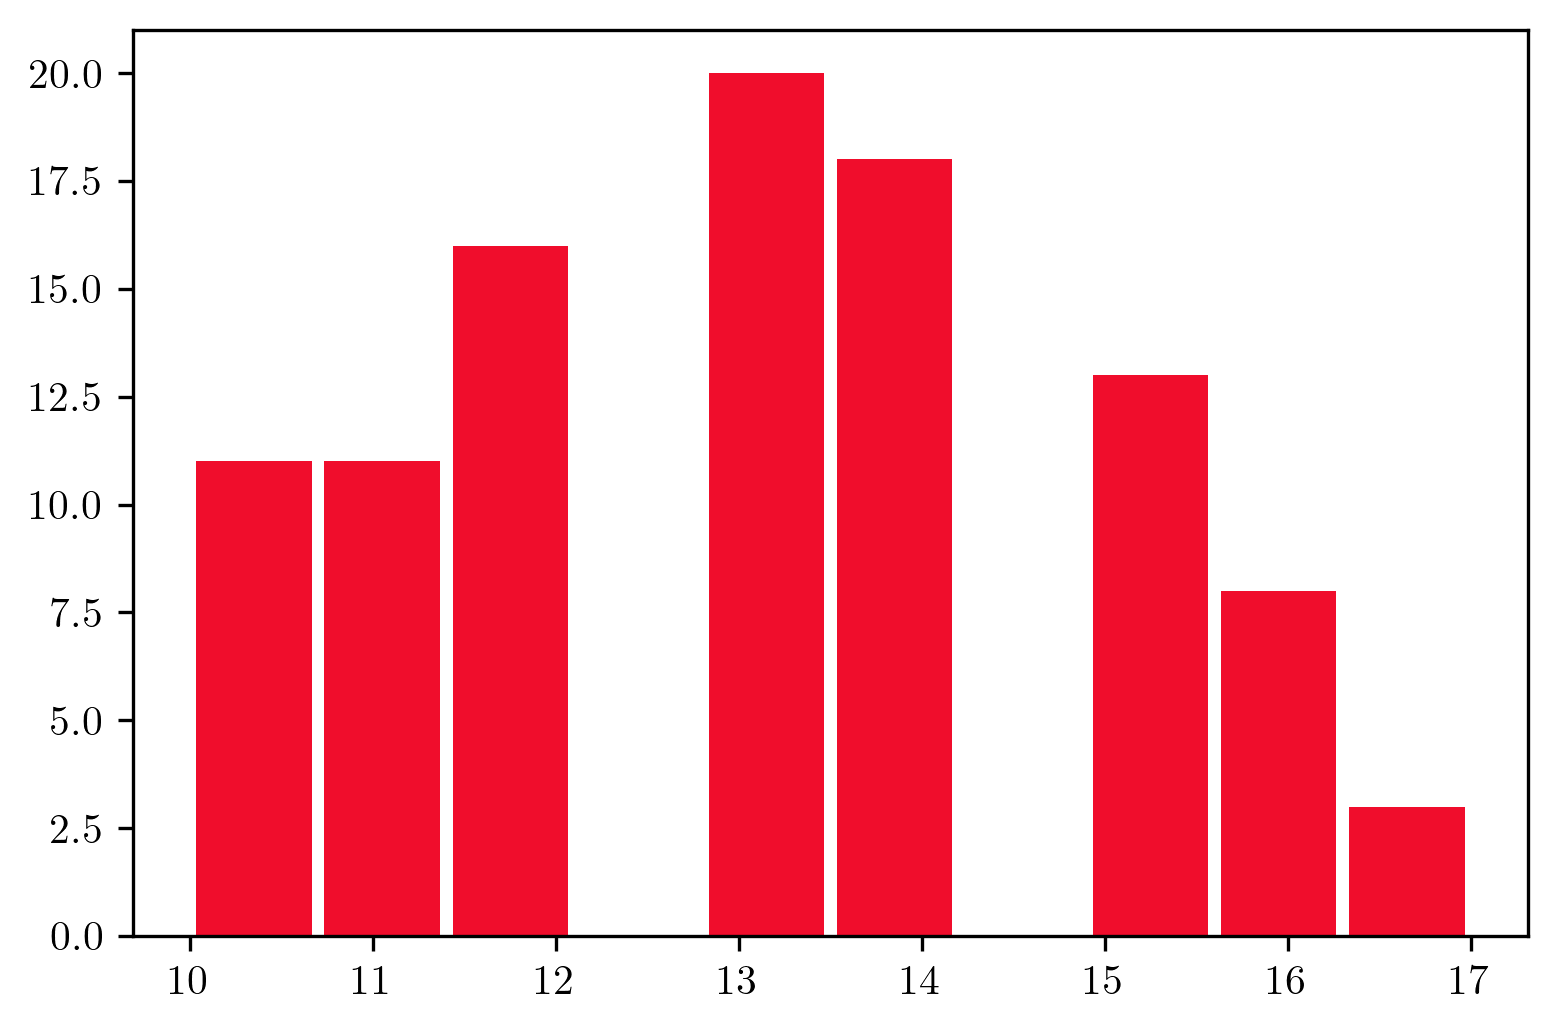

In [25]:
plt.hist(radii, rwidth=0.9)

Alternative, we can just draw the detected circles.

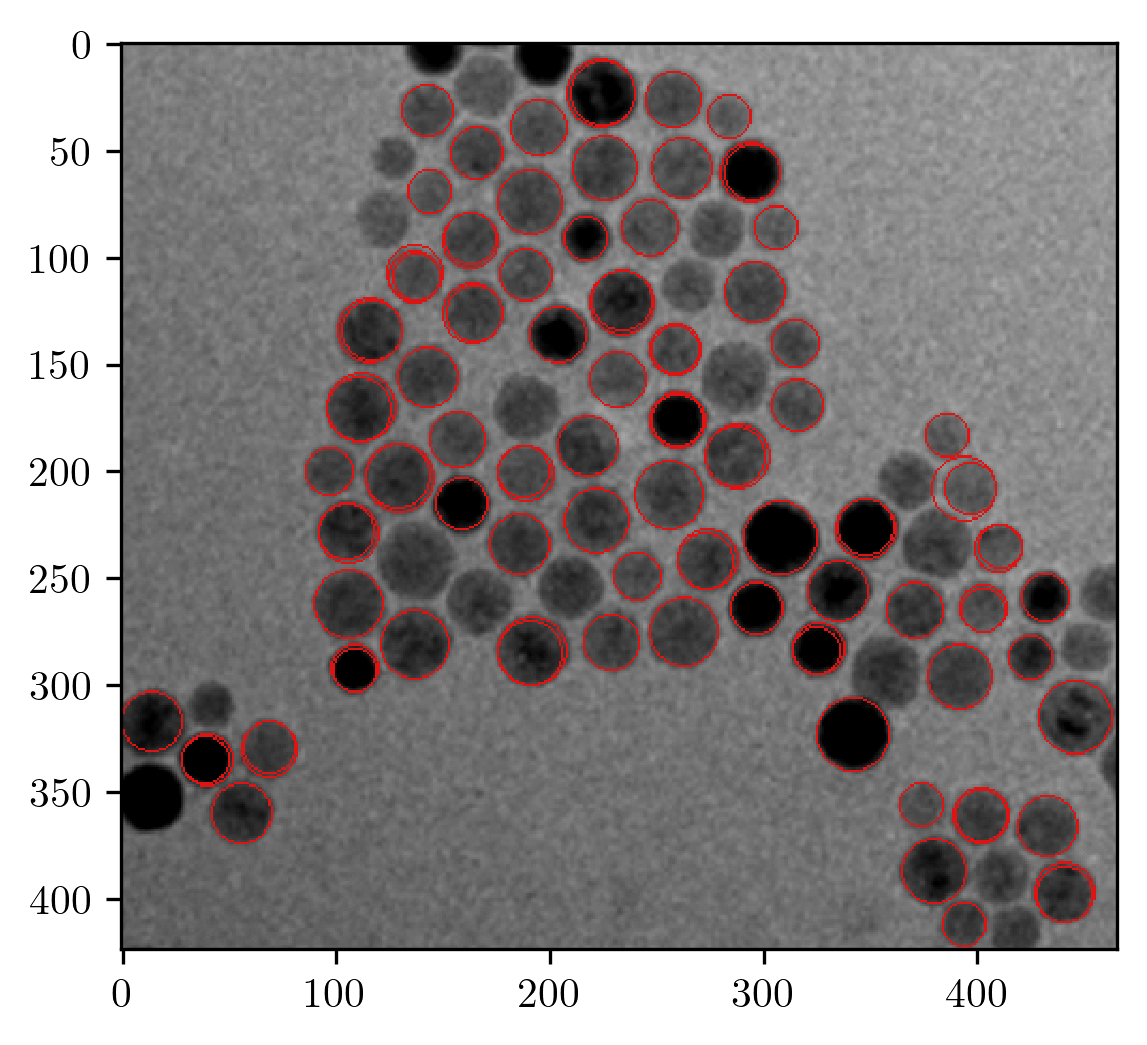

In [26]:
from skimage.draw import circle_perimeter
from skimage import color

image_plot = color.gray2rgb(image)

# Draw detected circles
fig, ax = plt.subplots(ncols=1, nrows=1)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image_plot[circy, circx] = (220, 20, 20)

ax.imshow(image_plot, cmap=plt.cm.gray)